<a href="https://colab.research.google.com/github/Octaxx/DLI-Assignment/blob/main/ModelTrainingWK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# === Step 1: Load DatasetCleaning.ipynb from GitHub ===
import requests, nbformat
from IPython import get_ipython

url = "https://raw.githubusercontent.com/Octaxx/DLI-Assignment/refs/heads/main/DatasetCleaning.ipynb"
response = requests.get(url)
notebook = nbformat.reads(response.text, as_version=4)
ipython = get_ipython()

print("⚙️ Running cells from DatasetCleaning.ipynb...\n")
for i, cell in enumerate(notebook.cells):
    if cell.cell_type == 'code':
        try:
            print(f"▶️ Executing cell {i+1}...")
            ipython.run_cell(cell.source)
        except Exception as e:
            print(f"❌ Error in cell {i+1}: {e}")
print("\n✅ All notebook cells executed.")

# Alias balanced dataset to df_G
df_G = df_balanced.copy()

⚙️ Running cells from DatasetCleaning.ipynb...

▶️ Executing cell 2...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
▶️ Executing cell 3...
📊 BEFORE BALANCING
--------------------------------------------------
Total rows before balancing: 18634
Class balance before balancing:
Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


,Email Text,Email Type,Label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,0
1,the other side of * galicismos * * galicismo *...,Safe Email,0
2,re : equistar deal tickets are you still avail...,Safe Email,0
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,1
4,software at incredibly low prices ( 86 % lower...,Phishing Email,1
5,global risk management operations sally congra...,Safe Email,0
6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email,0
7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email,1
8,"we owe you lots of money dear applicant , afte...",Phishing Email,1
9,re : coastal deal - with exxon participation u...,Safe Email,0


▶️ Executing cell 4...

📊 AFTER BALANCING (Oversampling)
--------------------------------------------------
Total rows after balancing: 22644
Class balance after balancing:
Email Type
Phishing Email    11322
Safe Email        11322
Name: count, dtype: int64
▶️ Executing cell 5...

🧾 SAMPLE OF CLEANED & BALANCED DATAFRAME
Total Rows        : 22644
Phishing Emails   : 11322
Safe Emails       : 11322

🧪 Cleaned & Balanced DataFrame (First 5 Rows):


,Email Text,Email Type,Label
0,INVESTMENT SCHOLARS CLUB- bringing you the lat...,Phishing Email,1
1,semantics : il dominio tempo-aspettuale il dom...,Safe Email,0
2,mature mom and her young horny lover ! . . woo...,Phishing Email,1
3,do you own a car ; starting december 7 th ford...,Phishing Email,1
4,rescue you from highprice medicaments and badp...,Phishing Email,1



🎯 Phishing Emails (First 5):


,Email Text,Email Type,Label
0,INVESTMENT SCHOLARS CLUB- bringing you the lat...,Phishing Email,1
2,mature mom and her young horny lover ! . . woo...,Phishing Email,1
3,do you own a car ; starting december 7 th ford...,Phishing Email,1
4,rescue you from highprice medicaments and badp...,Phishing Email,1
11,New Web Technology\nUNLIMITED WEB CONFERENCING...,Phishing Email,1



✅ Safe Emails (First 5):


,Email Text,Email Type,Label
1,semantics : il dominio tempo-aspettuale il dom...,Safe Email,0
5,http://www.bbc.co.uk/radio1/alt/nireland/ni_te...,Safe Email,0
6,Hi Damian.SuSe has a Sparc version I previousl...,Safe Email,0
7,"hpl nom for may 25 , 2001 ( see attached file ...",Safe Email,0
8,iatl 14 : final cfp the 14th annual meeting - ...,Safe Email,0


▶️ Executing cell 6...

🧠 Sample Extracted Features (First 5):


,Email Preview,char_count,word_count,exclamation_count,uppercase_ratio,has_link,has_login_word,has_html
0,INVESTMENT SCHOLARS CLUB- bringing you the lat...,3893,586,2,0.034,0,1,0
1,semantics : il dominio tempo-aspettuale il dom...,904,154,0,0.000,0,0,0
2,mature mom and her young horny lover ! . . woo...,664,141,1,0.000,0,0,0
3,do you own a car ; starting december 7 th ford...,792,170,0,0.000,0,0,0
4,rescue you from highprice medicaments and badp...,796,163,0,0.000,0,0,0



✅ Final Columns:
['Email Text', 'Email Type', 'Label', 'Email Preview', 'char_count', 'word_count', 'exclamation_count', 'uppercase_ratio', 'has_link', 'has_login_word', 'has_html']

✅ All notebook cells executed.


In [14]:
!pip install scikeras
!pip install scikit-learn==1.4.2

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Input

# TF-IDF for LR and KNN
tfidf_vectorizer_WK = TfidfVectorizer(max_features=10000)
X_tfidf_WK = tfidf_vectorizer_WK.fit_transform(df_balanced['Email Text']).toarray()
y = df_balanced['Label'].values

# CNN Tokenization
tokenizer = Tokenizer(num_words=15000, oov_token='<OOV>')
tokenizer.fit_on_texts(df_balanced['Email Text'])
sequences = tokenizer.texts_to_sequences(df_balanced['Email Text'])
X_seq = pad_sequences(sequences, maxlen=200)

# Train-Test Split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf_WK, y, test_size=0.2, random_state=42)
X_train_seq, X_test_seq, _, _ = train_test_split(X_seq, y, test_size=0.2, random_state=42)


In [15]:
# Logistic Regression in Keras
def create_lr_model():
    model = Sequential()
    model.add(Input(shape=(X_train_tfidf.shape[1],)))  # use Input instead of input_dim
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lr_model = KerasClassifier(model=create_lr_model, epochs=1, batch_size=32, verbose=0)

# KNN (no epochs)
knn_model = KNeighborsClassifier(n_neighbors=5)

# CNN in Keras
def create_cnn_model():
    model = Sequential()
    model.add(Input(shape=(200,)))  # replace input_length=200
    model.add(Embedding(input_dim=15000, output_dim=128))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = KerasClassifier(model=create_cnn_model, epochs=3, batch_size=64, verbose=1)



In [16]:
# Fit each model separately
lr_model.fit(X_train_tfidf, y_train, validation_data=(X_test_tfidf, y_test), verbose=1)
knn_model.fit(X_train_tfidf, y_train)
cnn_model.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test), verbose=1)
history = cnn_model.history_


567/567 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8837 - loss: 0.6282 - val_accuracy: 0.9686 - val_loss: 0.4716
Epoch 1/3
284/284 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8626 - loss: 0.3683 - val_accuracy: 0.9795 - val_loss: 0.0596
Epoch 2/3
284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9812 - loss: 0.0435 - val_accuracy: 0.9848 - val_loss: 0.0419
Epoch 3/3
284/284 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9901 - loss: 0.0232 - val_accuracy: 0.9845 - val_loss: 0.0412


In [17]:
# Get predictions from each
lr_preds = lr_model.predict(X_test_tfidf)
knn_preds = knn_model.predict(X_test_tfidf)
cnn_preds = cnn_model.predict(X_test_seq)

# Combine predictions using majority voting
import numpy as np
combined_preds = np.round((lr_preds + knn_preds + cnn_preds) / 3).astype(int)

# Evaluate ensemble
ensemble_acc = accuracy_score(y_test, combined_preds)
print(f"📊 Ensemble Model Accuracy: {ensemble_acc:.4f}")


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
📊 Ensemble Model Accuracy: 0.9784


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

acc_wk = accuracy_score(y_test, combined_preds)
prec_wk = precision_score(y_test, combined_preds)
recall_wk = recall_score(y_test, combined_preds)
F1_wk = f1_score(y_test, combined_preds)
ROC_wk = roc_auc_score(y_test, (lr_preds + knn_preds + cnn_preds) / 3)

results = {
    'Accuracy': acc_wk,
    'Precision': prec_wk,
    'Recall': recall_wk,
    'F1': F1_wk,
    'ROC_AUC': ROC_wk
}

import pandas as pd
summary_df_wk = pd.DataFrame([results]).round(4)

print("\n📊 Ensemble Model Evaluation Metrics:\n")
print(summary_df_wk)



📊 Ensemble Model Evaluation Metrics:

   Accuracy  Precision  Recall      F1  ROC_AUC
0    0.9784     0.9603  0.9973  0.9784   0.9885


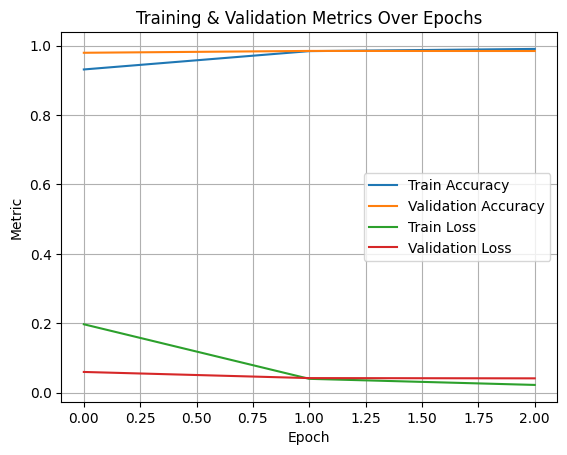

In [19]:
import matplotlib.pyplot as plt

# assuming `history` is the output from cnn_model.fit(...)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training & Validation Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


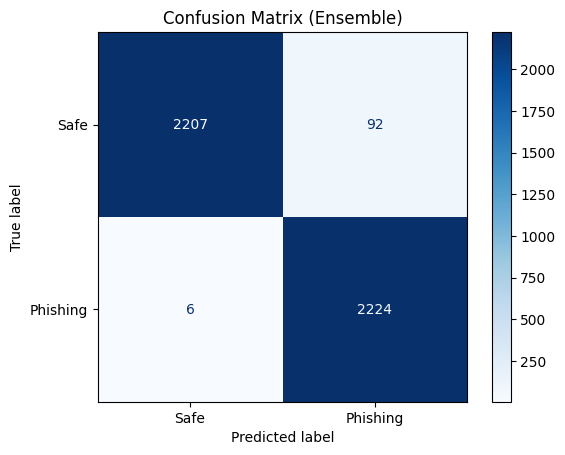

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, combined_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Safe", "Phishing"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Ensemble)")
plt.show()


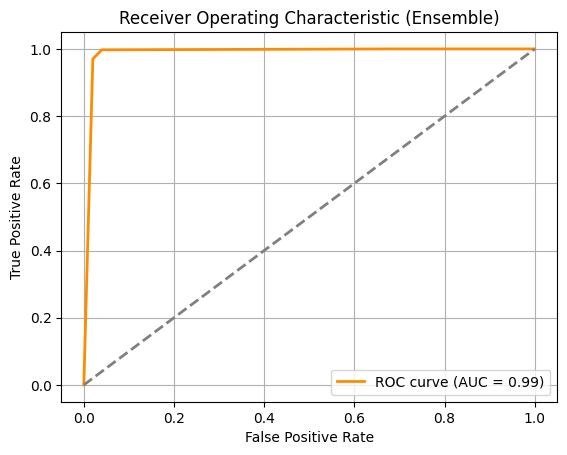

In [21]:
from sklearn.metrics import roc_curve, auc

# If cnn_model.predict_proba isn't supported, use model.predict and convert to float
probs = (lr_preds + knn_preds + cnn_preds) / 3  # already in [0,1] scale
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Ensemble)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


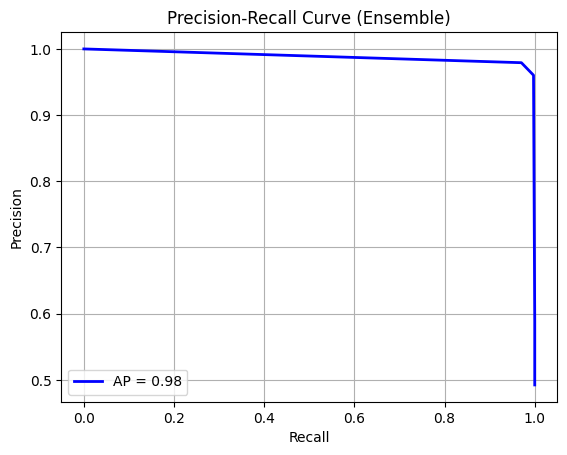

In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, probs)
avg_precision = average_precision_score(y_test, probs)

plt.plot(recall, precision, lw=2, color='blue', label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Ensemble)')
plt.grid(True)
plt.legend()
plt.show()
